<a href="https://colab.research.google.com/github/tunahanyalcin/phys290/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PS**: Some modules are not working when I close and open colab. Most probaby you already have them but please make sure all the necessary modules are present.
#**PS2**: I tried using Markdown but it took too much time since I did not know it earlier and I did not want to further delay my final due to my disability(sakatlık) that I mailed you about earlier.

# 1.1

In [ ]:
import numpy as np
import numdifftools as nd
import scipy as sp
from sympy import *
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl

#Define a reference frame
R = ReferenceFrame('R')

x, y, z = symbols('x y z')

#Let's define our vectors:
A = [3*(x**2),2*x]
B = [-5*x, -2*(x**2)]

#Suppose A and B are two vectors, we can define their dot product as follows:
def dpf(A,B):
  return sum(a*b for a,b in zip(A,B))

#For vector product, we will use numpy's numpy.cross
def vpf(A,B):
  return np.cross(A,B)

#To find the gradient, we can define a function as follows:
def gradient(V):
  gradx = 0
  grady = 0
  for i in range(len(A)):
    gradx += diff(V[i])
  return gradx


# We need to define the curl fn (grad x v)
def curl(f,x):
    jac = nd.Jacobian(f)(x)
    return np.array([jac[2,1]-jac[1,2],jac[0,2]-jac[2,0],jac[1,0]-jac[0,1]])

vA = 3*(R[0]**2)*R.x + 2*R[0]*R.y
vB = -5*R[0]*R.x - 2*(R[0]**2)*R.y

curl(A,x)


# (ii) suggests that
# grad(A.B) = A x (grad x B) + B x (grad x A) + (A.grad)B + (B.grad)A


# 1.2 <br> OK


Pi is approximately:  3.140728

Pi is actually:  3.141592653589793


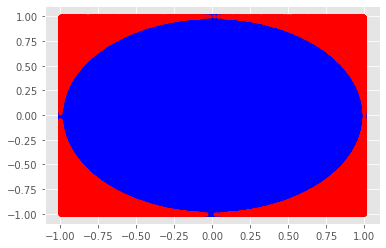

One can decrease the error in pi by increasing the number of throws, N.


In [36]:

from numpy import random
import numpy as np
import matplotlib.pyplot as plt

N = 1000000 #number of throws

circlex = []
circley = []

squarex = []
squarey = []

i = 1
while i <= N:
  x = random.uniform(-1,1) #Borders on x are from -1 to 1
  y = random.uniform(-1,1) #Borders on y are from -1 to 1
  if (x**2 + y**2 <= 1): #If x and y valeus are smaller than or equal to radius(1)
    circlex.append(x)
    circley.append(y)
  else:
    squarex.append(x)
    squarey.append(y)
  i += 1

pi = 4*len(circlex)/float(N)
print("Pi is approximately: ", pi)
print("")
print("Pi is actually: ", np.pi)

plt.plot(circlex, circley, 'b.')
plt.plot(squarex, squarey,'r.')
plt.show()

print('One can decrease the error in pi by increasing the number of throws, N.')

# 1.3 <br> FIND ERROR
$\int_0^{2\pi}x e^{-x k} \sin(x)\sin(2x) dx$ <br> <br> 
$\frac{\partial^{2}}{\partial x^2} \; x e^{-x k}\sin(x)\sin(2x)$

In [ ]:
import sympy as sym
import numpy as np
import math

init_printing(use_unicode = False, wrap_line = False)

x, k = symbols('x k')   #Declaring that x and k are symbols

#Integration
sym.integrate(x*(sym.exp(-x))*(sym.sin(x))*(sym.sin(2*x)), (x, 0, 2*np.pi))

#To find the error let's put the pi found in 1.2 instead of np.pi
sym.integrate(x*(sym.exp(-x))*(sym.sin(x))*(sym.sin(2*x)), (x, 0, 2*3.140024))

#The error is
(sym.integrate(x*(sym.exp(-x))*(sym.sin(x))*(sym.sin(2*x)), (x, 0, 2*3.140024)) - sym.integrate(x*(sym.exp(-x))*(sym.sin(x))*(sym.sin(2*x)), (x, 0, 2*np.pi))) / (sym.integrate(x*(sym.exp(-x))*(sym.sin(x))*(sym.sin(2*x)), (x, 0, 2*np.pi)) *100)



In [ ]:
#Differentiation
sym.diff(x*sym.exp(-x*k)*sym.sin(x)*sym.sin(2*x),x)

# 1.4 <br> OK
$\frac{\partial x}{\partial t} = \sin(t)(1+\delta (t))$ \\
at $x(t) = 0$

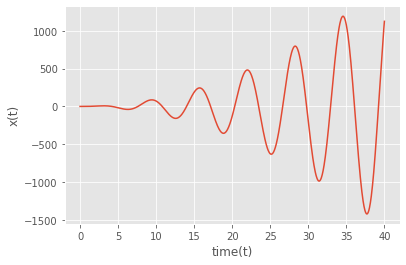

In [37]:
import scipy as sci
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#I chose k to be t^2 but it can be any function
def func(x,t):
  k = t**2
  dxdt = np.sin(t)*(1+ k)
  return dxdt


x0 = 0

t = np.linspace(0,40, 1000)

x = odeint(func, x0, t)
plt.plot(t,x)
plt.xlabel('time(t)')
plt.ylabel('x(t)')
plt.show()




# 1.5

# 1.6 <br> USE ML
**Matplotlib Tutorial**

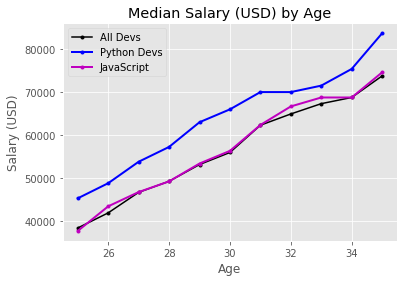

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import linear_model


dev_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] #x axis, ages
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752] #y axis, salaries

plt.plot(dev_x, dev_y, 'k-', marker='.', label='All Devs') #Allows us to work with a single plot

#Median Python Developer Salaries by Age
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

plt.plot(dev_x, py_dev_y, 'b-', marker='.',linewidth=2,label='Python Devs')

#Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(dev_x, js_dev_y,'m-',marker='.',linewidth=2,label='JavaScript')

plt.xlabel('Age')
plt.ylabel('Salary (USD)')
plt.title('Median Salary (USD) by Age') #Forms title

#In order to see which line belongs to which list, we can use legend as
#inside plt.legend or using label keyword while plotting
plt.legend()
plt.style.use('ggplot')
plt.show()





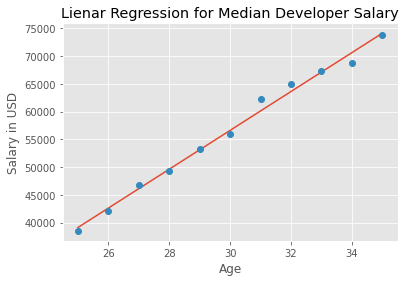

Slope of the linear fit is [3502.71818182]
Intercept of the linear fit is-48460.727272727345
The salary for a developer aged 40 is: [91648.]


In [35]:
#Let's use Machine Learning (Linear Regression Model to try and find the predicted salary for later years)
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
dev_x = np.array(range(25,36,1))
ages = dev_x.reshape(-1,1)
line_fitter = LinearRegression()  #Our linear regression func
line_fitter.fit(ages, dev_y)      #Fitting the linear fit function with the data
salary_predict = line_fitter.predict(ages)  #Predicting the y values

plt.plot(ages, salary_predict)
plt.plot(ages, dev_y, 'o')

plt.title('Lienar Regression for Median Developer Salary')
plt.xlabel('Age')
plt.ylabel('Salary in USD')
plt.show()

#So this model gave us a linear fit and we know its slope and intercept via
slope = line_fitter.coef_
intercept = line_fitter.intercept_
print('Slope of the linear fit is ' + str(slope))
print('Intercept of the linear fit is' + str(intercept))

#Then we can use this slope and intercept values to guess the salary for an age
# The line has the formula y = mx + b where m is the slope, y is the salary b is 
# the intercept and x is the age.

#Let's try using this to find the salary for a developer aged 40 years old

def salary(age):
  salary = (slope * age) + intercept
  return salary

print('The salary for a developer aged 40 is: ' + str(salary(40)))


# PART 2 <br> Explain machine learning briefly

- In our second class, we talked about a maze game kind of algorithm. When I went 
home, I coded a game but there was no GUI so I did not really like it and than I 
found a really good module called 'turtle' which I used to make the game. It's a
quite big of a module so I will not explain it but I will link the code here if you
want to check it out

PS It might not work using colab, please try another local IDE if that is the case

- Instead of the turtle, I will briefly explain a machine learning library of Python, seaborn. I saw this while I was studying Data Science from codecademy.com and found it pretty exciting.

#**Machine Learning** <br>
Machine Learning(ML) can be branched out into two categories. \\
1. Supervised Learning \\
2. Unspervised Learning \\

Supervised learning is where the data is labeled and the program learns how to predict the output from the input data. Supervised learning problems can be further grouped into regression and classification problems. \\
I shall talk about only regression today to keep this part brief.

**Regression** \\
In regression problems, we are trying to predict a discrete number of values like
- Is this picture of a human or a picture of an AI?
- Is this email spam?

>Unsupervised Learning \\

Unsupervised Learning is a type of ML where the program learns the inherent structure of the data based on unlabeled examples. \\
**Clustering** is a common unsupervised ML approach that finds patterns and structures in unlabeled data by grouping them into clusters. \\
Some examples: \\
- Social networks clustering topics in their news feed
- Consumer sites clustering users for recommendations 
- Search engines to group similar objects in one cluster

#Linear Regression

The purpose of machine learning is often to create a model that explains some real-world data, so that we can predict what may happen next, with different inputs.
The simplest model that we can fit to data is a line. When we are trying to find a line that fits a set ıf data best, we are performing Linear Regression.

Examples: \\
•	The market price of a house vs. The square footage of a house. Can we predict how much a house will sell for, given its size? \\
•	The tax rate of a country vs. İts GDP. Can we predict taxation based on a country’s GDP? \\
•	The amount of chips left in the bag vs. A number of chips taken. Can we predict how much longer this bag of chips will last, given how much people at this party have been eating? \\
<br>
A line is a rough approximation, but it allows us the ability to explain and predict variables that have a linear relationship with rach other. 
When we perform a linear regression, the goal is to set the “best” m and b for our data. \\
When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is. For each data point, we calculate loss, a number that measures how bad the model’s prediction was. You may have seen this being referred to as error. \\
We can think about the loss as the squared distance from the point to the line.
The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data.

To see how to use perform linear regression, see the previous question.
